In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
filepath = "../game.mp4" # movie file

In [90]:
def read_movie():
    movie = cv2.VideoCapture(filepath)
    if not movie.isOpened():
        print("can't open")
        exit()
    return movie

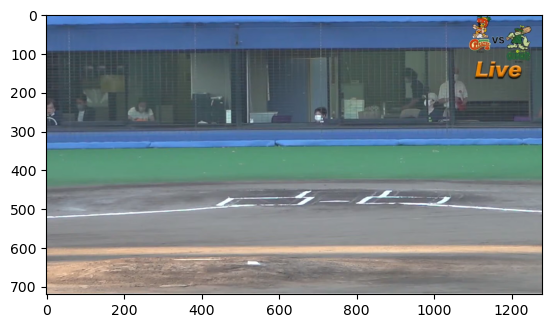

In [86]:
target_frame = 1
for i in range(target_frame):
    movie = read_movie()
    ret, frame = movie.read()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [106]:
def print_diff(frame_before, frame_after):
    plt.subplot(211)
    plt.imshow(cv2.cvtColor(frame_before, cv2.COLOR_BGR2RGB))
    plt.subplot(212)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

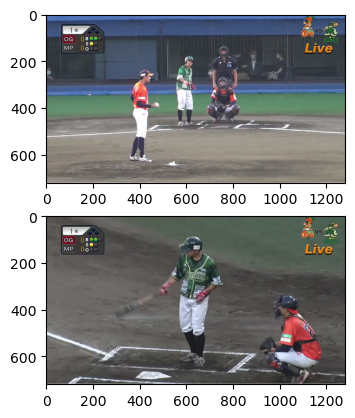

In [127]:
frame_count = 1000
# movie = read_movie()
ret, frame = movie.read()
for i in range(frame_count):
    frame_before = frame
    ret, frame = movie.read()
    frame_diff = cv2.absdiff(frame_before, frame)
    frame_mean = frame_diff.mean()
    if frame_mean > 10:
        print_diff(frame_before, frame)
        break
    # plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [123]:
frame_diff.mean()

32.647451895254626